# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), we need to build a model that can predict whether or nor a borrower will pay back their loan. This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. 

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [131]:
import pandas as pd

In [132]:
# import information on dataset
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [133]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [134]:
# function provided for looking at feature description
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [135]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading data and other imports

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [137]:
# import data
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [138]:
# checking if any nulls in the loan status column
df[df['loan_status'].isna()]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

From above, it is evident that emp_title, sub_grade, title, revol_util, mort_acc and pub_rec_bankruptcies have missing values

# Section 1

### Creating a countplot of loan status, our label

<AxesSubplot:xlabel='loan_status', ylabel='count'>

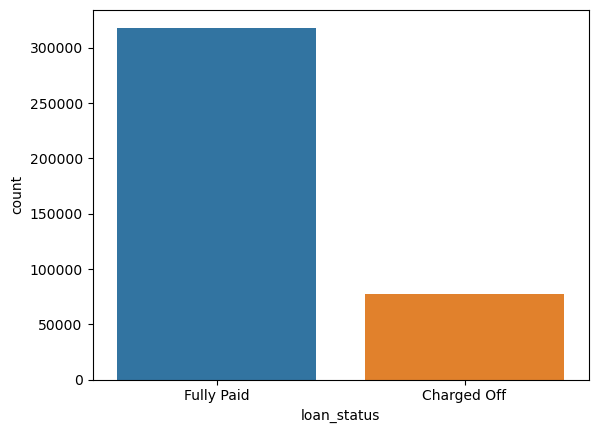

In [10]:
# see number of instances per label - see if well balanced problem or not
sns.countplot(x='loan_status', data=df)

From Lending Club website: "Charged Off - LendingClub charges off a loan when we no longer reasonably expect further payments. Generally, charge-offs occur no later than 30 days after the loan enters Default status. Once a loan is charged off, the remaining principal balance of the Note is deducted from the account balance"

### Histogram of the loan_amnt column

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

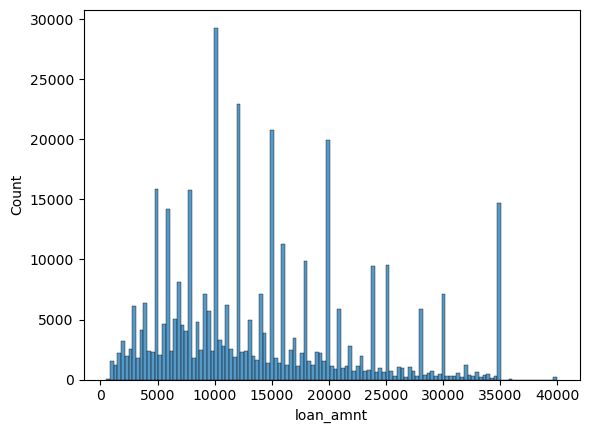

In [11]:
sns.histplot(df['loan_amnt'])

### Looking at correlation between all continuous numeric variables using .corr() method

In [12]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr() 
correlation_matrix

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


#### Visualize correlation using a heatmap

<AxesSubplot:>

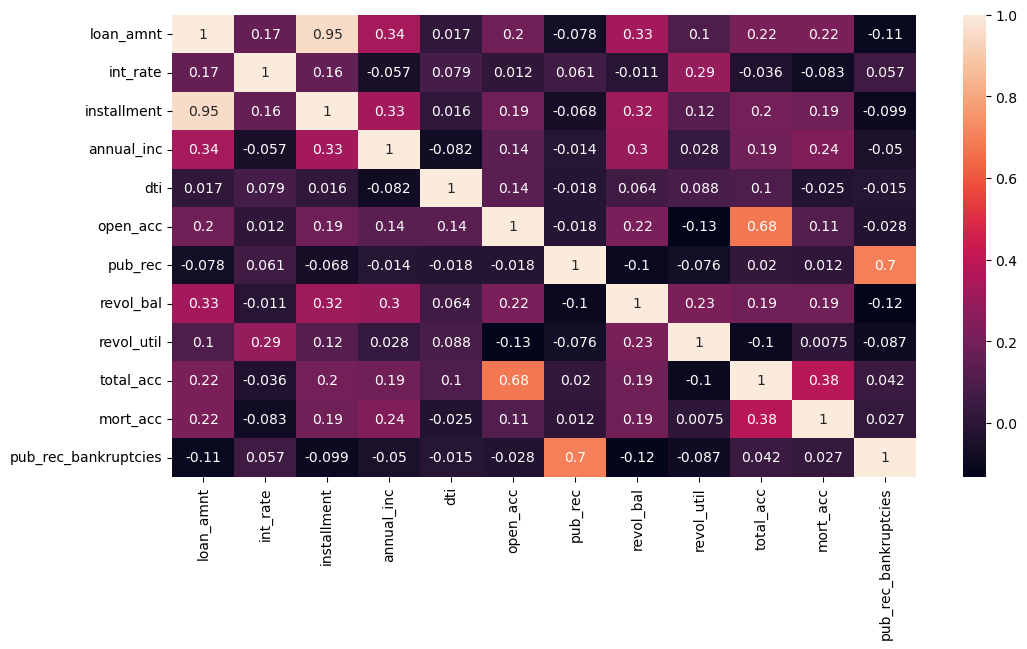

In [13]:
# correlation visualised as heatmap
plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, annot=True)

### One can see strong correlation between "installment" and "loan_amnt"

In [14]:
# what are the descriptions of these 2 features
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [15]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

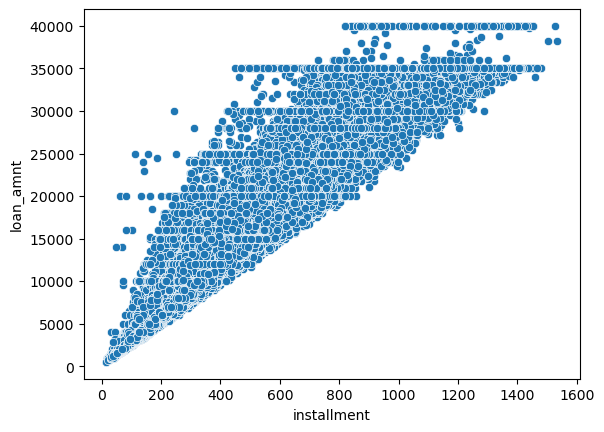

In [16]:
sns.scatterplot(df, x='installment', y='loan_amnt')

This strong correlation makes sense as the installments would be based on the loan amount, and therefore this strong relationship may represent duplicate info for us

In [17]:
# dropping installment column
df = df.drop('installment', axis=1)

### Boxplot showing the relationship between the loan_status and the Loan Amount

<AxesSubplot:xlabel='loan_amnt', ylabel='loan_status'>

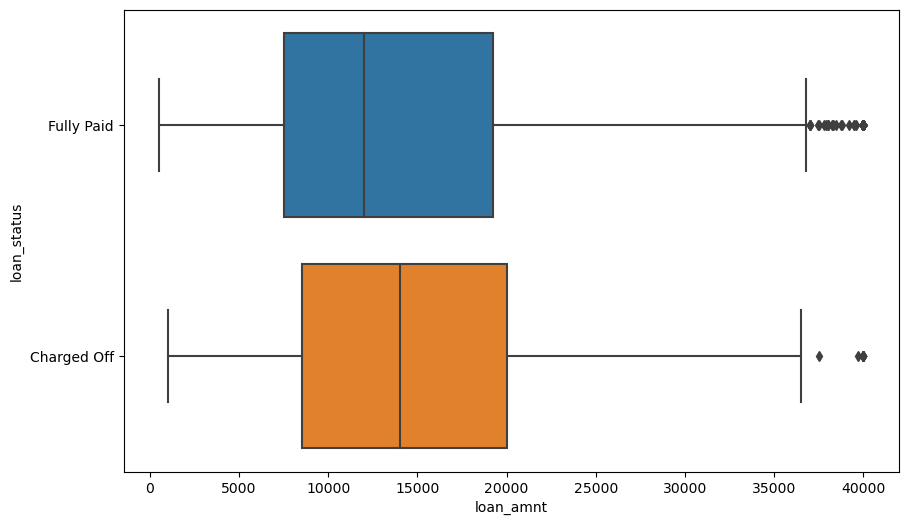

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_amnt', y='loan_status', data=df)

From the above, it seems that those loans that are charged off have a slightly higher average amount than those that are fully paid

### Calculating the summary statistics for the loan amount, grouped by the loan_status.

In [19]:
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


The above confirms that loans that are charged off have a slightly higher average than those fully paid

### Looking at the Grade and SubGrade columns

In [20]:
grades_sorted = sorted(df.grade.unique())

In [21]:
sub_grades_sorted = sorted(df.sub_grade.unique())

### Looking at the loan status by grade

<AxesSubplot:xlabel='grade', ylabel='count'>

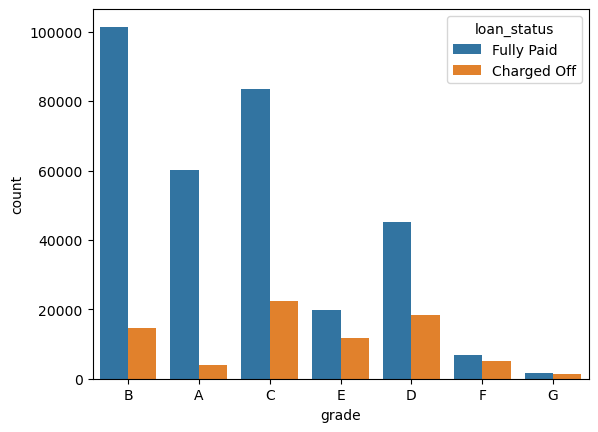

In [22]:
sns.countplot(df,x='grade',hue='loan_status')

As may be expected, higher grades (A, B etc) are more likely to be fully paid, with less of them charged off

### Looking at the counts by subgrade

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

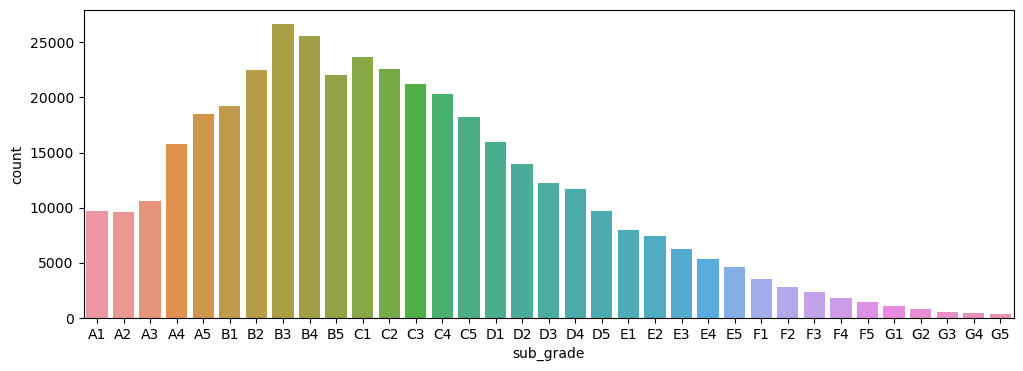

In [23]:
plt.figure(figsize=(12,4))
sns.countplot(df,x='sub_grade', order = sub_grades_sorted)

### Counts by subgrade, grouped by loan status

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

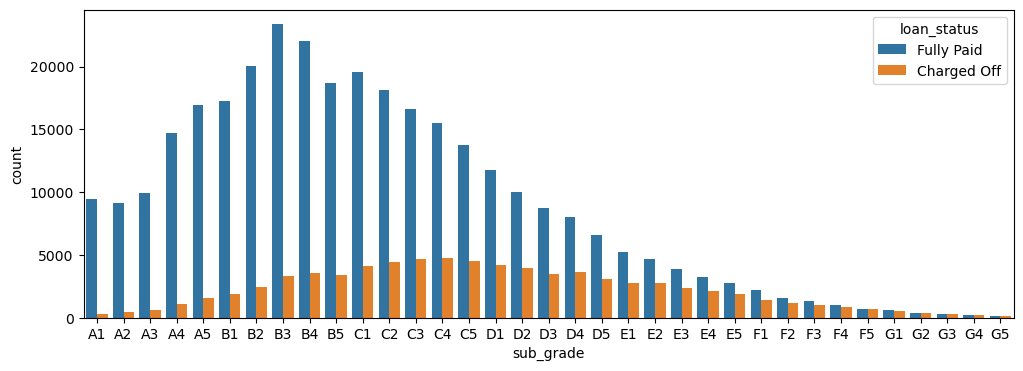

In [24]:
plt.figure(figsize=(12,4))
sns.countplot(df,x='sub_grade', order = sub_grades_sorted, hue='loan_status')

As suspected, those of higher grades tend to pay their loans off more frequently than those with lower grades (F and G)

### Narrowing down data to F and G subgrades

In [25]:
df_f_g = df[(df['grade']== 'F') | (df['grade']== 'G')]

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

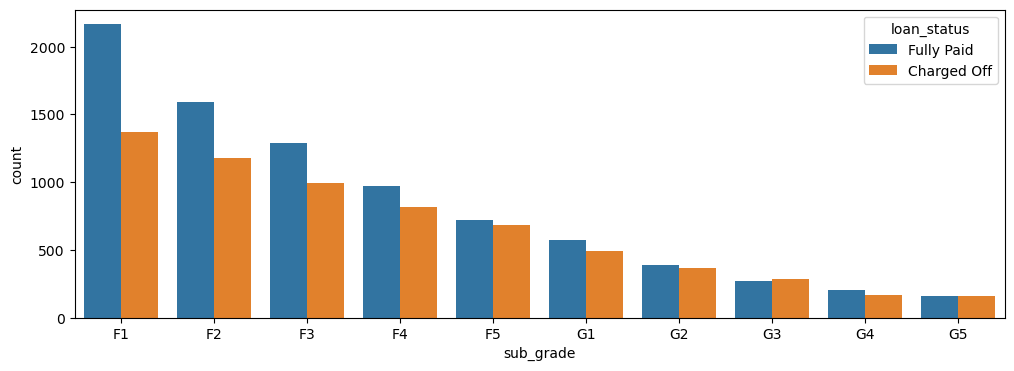

In [26]:
plt.figure(figsize=(12,4))
sub_grades_sorted = sorted(df_f_g.sub_grade.unique())
sns.countplot(df_f_g,x='sub_grade', order = sub_grades_sorted, hue='loan_status')

Starts to become almost matched (fully paid and charged off) at around F5 and below

Making a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off"

In [27]:
def categorise(row):  
    if row['loan_status'] == 'Fully Paid':
        return 1
    return 0

In [28]:
df['loan_repaid'] = df.apply(lambda row: categorise(row), axis=1)

In [29]:
df[['loan_status', 'loan_repaid']]

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


### Looking at the correlation of the numeric features to the new loan_repaid column

<AxesSubplot:>

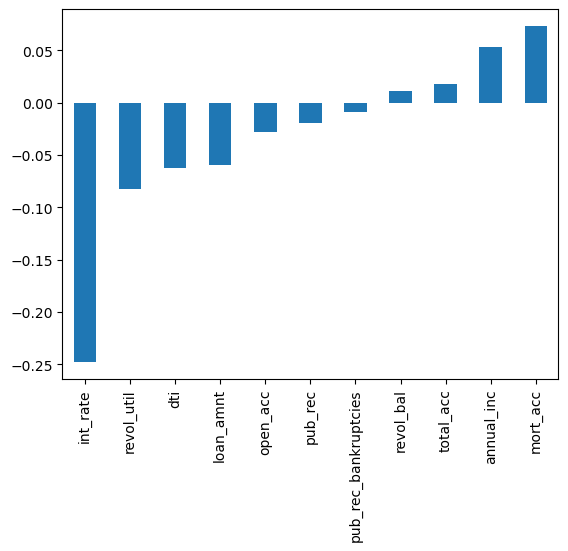

In [30]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr() 
correlation_matrix['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

Understandably, the interest rate is negatively correlated to loan repayment, while annual income is somewhat positively correlated with it

# Section 2: Data PreProcessing¶

In [31]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


# Missing Data

### Length of the dataframe


In [32]:
len(df)

396030

Looking at the count of missing values

In [33]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

### Looking at these as percentage of total dataframe


In [34]:
(df.isnull().sum()/len(df)) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

### Examining emp_title and emp_length to see whether it will be okay to drop them

In [35]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [36]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


### Number of unique employment job titles

In [37]:
df['emp_title'].nunique()

173105

In [38]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

Realistically there are too many unique job titles to try to convert this to a dummy variable feature, so we will remove the emp_title column.

In [39]:
df.drop(['emp_title'], axis=1, inplace=True)

### Creating a count plot of the emp_length feature column

In [40]:
sorted(df['emp_length'].value_counts().index)

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [41]:
# creating an ordering for the data so it appears by order of years
custom_order = ['< 1 year','1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

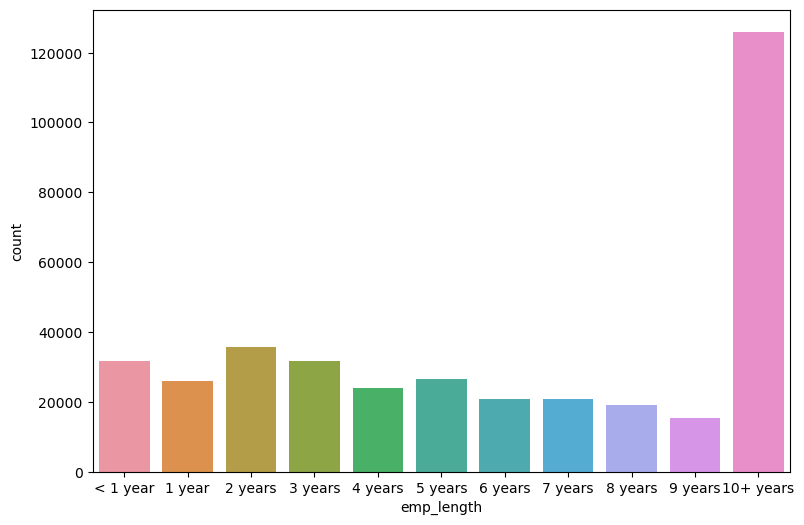

In [42]:
plt.figure(figsize=(9,6))
sns.countplot(df,x='emp_length', order = custom_order)

### Looking at the employment length, split out into loan status

<AxesSubplot:xlabel='emp_length', ylabel='count'>

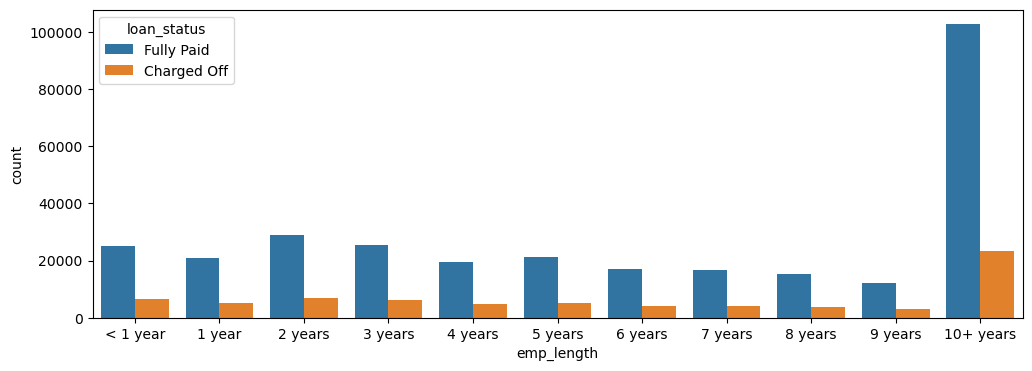

In [43]:
plt.figure(figsize=(12,4))
sns.countplot(df,x='emp_length', order = custom_order, hue='loan_status')

Those with a longer employment length appear to be more likely to have paid off their loan. The 10+ category doesn't tell us how much over 10 it is, so these could be many more than 9 years and that could explain the difference in number of loans

This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan

In [44]:
# Number charged off grouped by employment length
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [45]:
# Number fully paid grouped by employment length
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [46]:
# charged off divided by fully paid
emp_len = emp_co/emp_fp

In [47]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

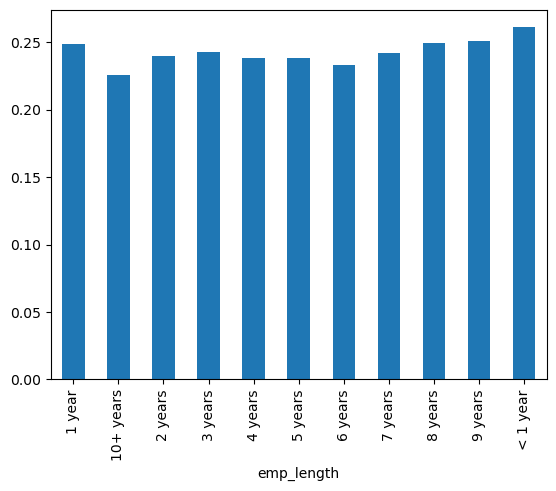

In [48]:
emp_len.plot(kind='bar')

So those who had been employed for less than a year have a slightly higher proportion of charged off debts to fully paid compared to other employment lengths, but in general, charge off rates are similar across all employment lengths so this doesn't appear to be an important feature, so we will drop it

In [49]:
df.drop(['emp_length'], axis=1, inplace=True)

Moving on to the title column vs the purpose column. Is this repeated information?

In [51]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [52]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

Given that the title column seems to duplicate the category information of the purpose column, we do not need both of them and will drop title, given it is missing data

In [53]:
df.drop(['title'], axis=1, inplace=True)

Looking at what the mort_acc feature represents

In [54]:
feat_info('mort_acc')

Number of mortgage accounts.


Looking at the value_counts of the mort_acc column.

In [55]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

Looking at the other columns to see which most highly correlates to mort_acc, with a view to using this correlation to help fill in the missing data in this column

In [56]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr() 
correlation_matrix['mort_acc'].sort_values().drop('mort_acc')

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
Name: mort_acc, dtype: float64

The total_acc feature correlates with the mort_acc the most, this makes sense! We then group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry

In [57]:
total_acc_avg = numeric_df.groupby('total_acc').mean()['mort_acc']

We then fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we fill in that missing value with the mean value corresponding to its total_acc value from the Series created above

In [58]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [59]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [60]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

The remaining missing data is a very small amount so we will drop it

In [61]:
df = df.dropna()

### Categorical Variables and Dummy Variables

We now need to look at the non-numeric columns and convert them to dummy variables, as relevant

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395219 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   grade                 395219 non-null  object 
 4   sub_grade             395219 non-null  object 
 5   home_ownership        395219 non-null  object 
 6   annual_inc            395219 non-null  float64
 7   verification_status   395219 non-null  object 
 8   issue_d               395219 non-null  object 
 9   loan_status           395219 non-null  object 
 10  purpose               395219 non-null  object 
 11  dti                   395219 non-null  float64
 12  earliest_cr_line      395219 non-null  object 
 13  open_acc              395219 non-null  float64
 14  pub_rec               395219 non-null  float64
 15  revol

In [64]:
df.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

# term feature

Given that the term feature has a numerical basis, we can convert it into either a 36 or 60 integer numeric data type

In [65]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [66]:
df['term'].value_counts()

term
 36 months    301247
 60 months     93972
Name: count, dtype: int64

In [67]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [68]:
df['term'].value_counts()

term
36    301247
60     93972
Name: count, dtype: int64

# grade feature

We already know that grade is part of sub_grade, so we will drop the grade feature

In [69]:
df.drop(['grade'], axis=1, inplace=True)

We then convert the sub_grade into dummy variables and concatenate these new columns to the original dataframe, while dropping the original non-numeric columns

In [70]:
dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

df = pd.concat([df.drop('sub_grade', axis=1),dummies],axis=1)

In [71]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

# verification_status, application_type,initial_list_status,purpose

We convert these columns into dummy variables too

In [73]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']], drop_first=True)

df = pd.concat([df.drop(['verification_status', 'application_type','initial_list_status','purpose'], axis=1),dummies],axis=1)

# home_ownership

Looking at the breakdown of the home_ownership column

In [76]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

NONE and ANY can probably be combined with OTHER given their relatively small values. We combine these and then create dummy variables for the home_ownership columns

In [77]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'],'OTHER')

In [78]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: count, dtype: int64

In [79]:
dummies = pd.get_dummies(df['home_ownership'], drop_first=True)

df = pd.concat([df.drop('home_ownership', axis=1),dummies],axis=1)

# address

We feature engineer a zip code column from the address in the data set, given that there is likely to be a finite number of zip codes in the dataset

In [80]:
df['zip_code'] = df['address'].apply(lambda address: address[-5:])

In [81]:
df['zip_code'].value_counts()

zip_code
70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: count, dtype: int64

In [82]:
df['address']

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

We make this zip_code column into dummy variables

In [83]:
dummies = pd.get_dummies(df['zip_code'], drop_first=True)

df = pd.concat([df.drop(['zip_code','address'], axis=1),dummies],axis=1)

# issue_d

This is the month which the loan was funded. If we were to include this in our model, it would be data leakage, as we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, so we drop this feature

In [85]:
feat_info('issue_d')

The month which the loan was funded


In [86]:
df = df.drop('issue_d', axis=1)

# earliest_cr_line

This appears to be a historical time stamp feature. We extract the year from this feature, then convert it to a numeric feature

In [87]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda earliest_cr_line: int(earliest_cr_line[-4:]))

In [88]:
df['earliest_cr_year'].value_counts()

earliest_cr_year
2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: count, Length: 65, dtype: int64

In [89]:
df = df.drop('earliest_cr_line', axis=1)

# Train Test Split

In [90]:
from sklearn.model_selection import train_test_split

We drop the loan_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.

In [91]:
df = df.drop('loan_status', axis=1)

In [92]:
df['loan_repaid']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_repaid, Length: 395219, dtype: int64

In [93]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

Performing a train/test split with test_size=0.2 and a random_state of 101

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Normalizing the Data

Using a MinMaxScaler to normalize the feature data X_train and X_test

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
scaler = MinMaxScaler()

In [97]:
X_train = scaler.fit_transform(X_train)

In [98]:
X_test = scaler.transform(X_test)

In [99]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

Building a sequential model that will be trained on the data, including dropout layers to prevent overfitting

In [100]:
model = Sequential()

model.add(Dense(78, activation='relu'))
# to prevent overfitting, add a dropout layer
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
# to prevent overfitting, add a dropout layer
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
# to prevent overfitting, add a dropout layer
model.add(Dropout(0.2))

# sigmoid activation function pushes values to be between 1 and 0
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

Fitting the model to the training data for 25 epochs. Also adding in the validation data for later plotting

In [101]:
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256,
         validation_data=(X_test, y_test))

Epoch 1/25
1236/1236 [==============================] - 6s 4ms/step - loss: 0.3007 - val_loss: 0.2647
Epoch 2/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2654 - val_loss: 0.2646
Epoch 3/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2631 - val_loss: 0.2627
Epoch 4/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2619 - val_loss: 0.2623
Epoch 5/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2610 - val_loss: 0.2624
Epoch 6/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2604 - val_loss: 0.2616
Epoch 7/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2602 - val_loss: 0.2617
Epoch 8/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2596 - val_loss: 0.2614
Epoch 9/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2594 - val_loss: 0.2615
Epoch 10/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.258

In [102]:
# saving model
from tensorflow.keras.models import load_model
model.save('myfavouritemodel.h5')

C:\Users\moniq\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Section 3: Evaluating Model Performance.

Plotting out the validation loss versus the training loss

In [105]:
# returns dictionary of losses (model.history.history)
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

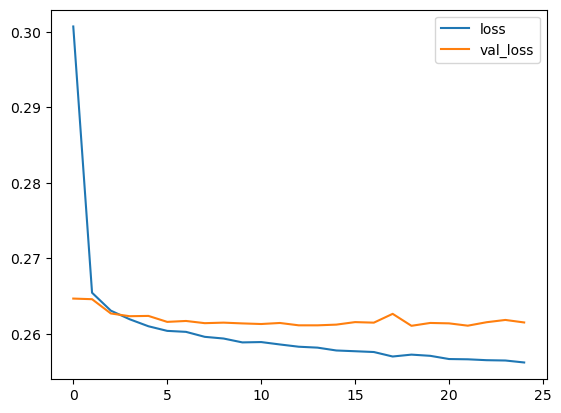

In [106]:
losses.plot()

Creating predictions from the X_test set and displaying a classification report and confusion matrix for the X_test set

In [108]:
from sklearn.metrics import classification_report, confusion_matrix

In [118]:
predictions  = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 [==============================] - 3s 1ms/step


In [119]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.44      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [120]:
confusion_matrix(y_test, predictions)

array([[ 6812,  8846],
       [   86, 63300]], dtype=int64)

Given the customer below, would you offer this person a loan? Testing the model

In [121]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.0
term                     60
int_rate              18.24
annual_inc          61665.0
dti                   30.11
                     ...   
48052                 False
70466                 False
86630                 False
93700                 False
earliest_cr_year       1996
Name: 305323, Length: 77, dtype: object

In [124]:
# need to scale data as our model was trained on scaled data
new_customer = scaler.transform(new_customer.values.reshape(1,77))

In [128]:
(model.predict(new_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 23ms/step


array([[1]])

Now checking the actual data, did this person end up paying back their loan

In [129]:
df.iloc[random_ind]['loan_repaid']

1